# Project Three --- Boston Crime

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import geopandas as gpd
import descartes
import fiona
from shapely.geometry import Point, Polygon

crimes = pd.read_csv('crime.csv')
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2018-08-21 0:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [8]:
# import pandas_profiling
# profile = crimes.profile_report(title='Boston Crimes Profiling')
# profile.to_file(output_file='boston-crimes-profiling.html')

### Cleaning the Data

#### Turning the date column into the datetime datatype

In [9]:
crimes['OCCURRED_ON_DATE'] = pd.to_datetime(crimes["OCCURRED_ON_DATE"])

#### Turning the SHOOTING column into a boolean (where NaN = False and Y = True)

https://statisticsglobe.com/replace-values-in-pandas-dataframe-python

In [10]:
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(False)
crimes['SHOOTING'] = crimes['SHOOTING'].replace("Y", True)
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,False,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


(checking to make sure it is true and false)

In [11]:
crimes.SHOOTING.value_counts()

False    318054
True       1019
Name: SHOOTING, dtype: int64

(checking to make sure we have the right data types (and we do!)

In [12]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       298823 non-null  float64       
 6   SHOOTING             319073 non-null  bool          
 7   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 8   YEAR                 319073 non-null  int64         
 9   MONTH                319073 non-null  int64         
 10  DAY_OF_WEEK          319073 non-null  object        
 11  HOUR                 319073 non-null  int64         
 12  UCR_PART             318983 non-null  object        
 13  STREET        

### Basic Questions

#### What are the range of dates being recorded?

In [13]:
crimes.OCCURRED_ON_DATE.sort_values(ascending=True).agg([max, min])

max   2018-09-03 21:25:00
min   2015-06-15 00:00:00
Name: OCCURRED_ON_DATE, dtype: datetime64[ns]

#### What are all the unique groups of offense codes and which are most prevalent in the data?

In [14]:
offense_code_groups = crimes.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=False)

TOP 10 offense code groups

In [15]:
offense_code_groups.head(10)

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

BOTTOM 10 offense code groups

In [16]:
offense_code_groups.tail(10)

Aircraft                                     36
Phone Call Complaints                        31
Explosives                                   27
Manslaughter                                  8
Gambling                                      8
HUMAN TRAFFICKING                             7
INVESTIGATE PERSON                            4
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Burglary - No Property Taken                  2
Name: OFFENSE_CODE_GROUP, dtype: int64

### Questions

#### What percentage of murders involved a shooting? (Look at Murder, non-negligent manslaughter (offense_code 111))

https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://www.tutorialspoint.com/how-to-get-the-index-and-values-of-series-in-pandas

In [17]:
murders = crimes.loc[crimes.OFFENSE_CODE == 111].groupby('SHOOTING').SHOOTING.count()
murders

SHOOTING
False     40
True     121
Name: SHOOTING, dtype: int64

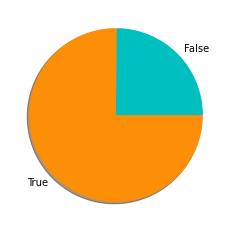

In [18]:
plt.pie(murders, labels=murders.index, shadow=True, colors = ['c', '#fd8e08'])
plt.show()

#### Are there certain times of the year when crime is more prevalent in Boston?

(adding a new column in the original dataframe (crimes) with every month by number)

https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/

In [19]:
crime_by_month = crimes.loc[crimes.YEAR == 2016].groupby('MONTH').MONTH.count().to_frame()
crime_by_month.columns = ['2016']
crime_by_month['2015'] = crimes.loc[crimes.YEAR == 2015].groupby('MONTH').MONTH.count()
crime_by_month['2017'] = crimes.loc[crimes.YEAR == 2017].groupby('MONTH').MONTH.count()
crime_by_month['2018'] = crimes.loc[crimes.YEAR == 2018].groupby('MONTH').MONTH.count().drop(9)
crime_by_month['Yearly Average'] = crime_by_month.mean(axis=1)
crime_by_month

,2016,2015,2017,2018,Yearly Average
MONTH,,,,,
1,7835,NaN,7993,7782.0,7870.000000
2,7308,NaN,7408,6937.0,7217.666667
3,8199,NaN,8179,7768.0,8048.666667
4,8101,NaN,8069,7916.0,8028.666667
5,8578,NaN,8715,8906.0,8733.000000
6,8558,4191.0,8985,8834.0,7642.000000
7,8619,8324.0,9075,8538.0,8639.000000
8,8938,8342.0,9206,8337.0,8705.750000
9,8522,8414.0,8940,NaN,8625.333333


(my barchart is based of the yearly average of crimes per month) (also while the dates in the dateframe are not in order of time from left to right, I left it like that because it does not affect my Yearly Average column whatsoever and that is what my barchart is based on)

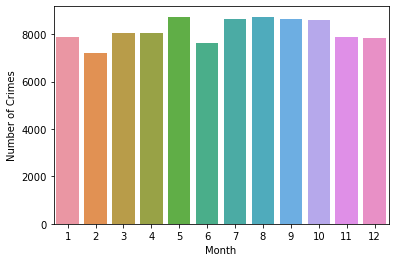

In [20]:
ax=plt.subplots()

ax=sns.barplot(x=crime_by_month.index, y=crime_by_month['Yearly Average'])

ax.set(xlabel='Month', ylabel='Number of Crimes')

plt.show()

I don't think that there is really a time of year when crime is less in Boston. The least number of crimes is in February but I think that may just be because there are less days in February, so at least Boston has a fairly consistant amount of crimes.

### My Questions

#### What time of day is crime most and least prevalent?

(summing up all the crime that happened in every hour for the entire dataset)

In [21]:
crime_date = crimes.groupby('HOUR').HOUR.count().to_frame()
crime_date.columns = ['TOTAL NUMBER OF CRIMES']
crime_date

,TOTAL NUMBER OF CRIMES
HOUR,
0,15106
1,9269
2,7693
3,4589
4,3408
5,3311
6,5026
7,8850
8,13043


(representing it in a lineplot) (apparently 5:00 AM has the least amount of crime and incidents)

Text(0, 0.5, 'AMOUNT OF CRIME')

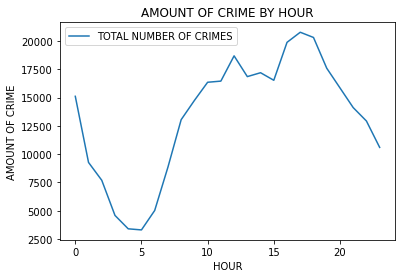

In [22]:
sns.lineplot(data=crime_date)
plt.title('AMOUNT OF CRIME BY HOUR')
plt.ylabel('AMOUNT OF CRIME')

(same data but represented in a fun colorful bar chart)

Text(0, 0.5, 'AMOUNT OF CRIME')

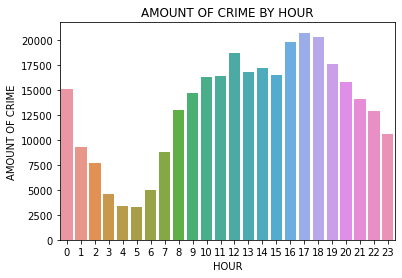

In [23]:
sns.barplot(data=crime_date, x=crime_date.index, y='TOTAL NUMBER OF CRIMES')
plt.title('AMOUNT OF CRIME BY HOUR')
plt.ylabel('AMOUNT OF CRIME')

I added various of the most common (and also HOMICIDE because I was interested) incidents and crimes  to the chart to see how they compared to the total amount of crime per hour.

<AxesSubplot:xlabel='HOUR'>

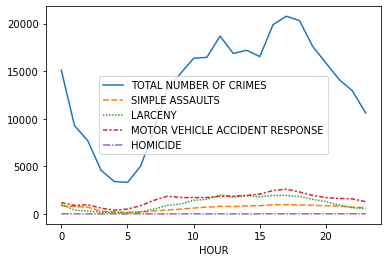

In [24]:
crime_date['SIMPLE ASSAULTS'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Simple Assault'].groupby('HOUR').HOUR.count()
crime_date['LARCENY'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Larceny'].groupby('HOUR').HOUR.count()
crime_date['MOTOR VEHICLE ACCIDENT RESPONSE'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Motor Vehicle Accident Response'].groupby('HOUR').HOUR.count()
crime_date['HOMICIDE'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Homicide'].groupby('HOUR').HOUR.count()
sns.lineplot(data=crime_date)

I then wanted to see how these incidents and crimes looked over a 24 hour period and I felt that the total number of crimes was really obscuring the data, so I got rid of that column.

https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

<AxesSubplot:xlabel='HOUR'>

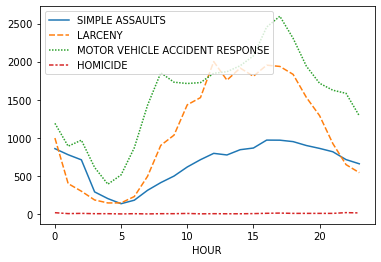

In [25]:
crime_date_no_total = crime_date.drop('TOTAL NUMBER OF CRIMES', axis=1)
sns.lineplot(data=crime_date_no_total)

Then I became interested in what times of day homicide is most likely to occur, since it doesn't have many data points and looks pretty much flat on the other lineplots.

<AxesSubplot:xlabel='HOUR'>

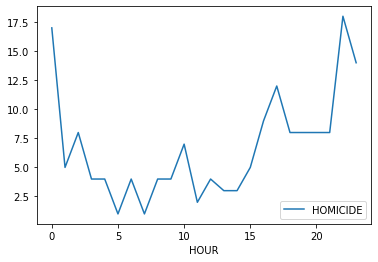

In [26]:
only_HOMICIDE = crime_date_no_total.drop(['SIMPLE ASSAULTS', 'LARCENY', 'MOTOR VEHICLE ACCIDENT RESPONSE'], axis=1)
sns.lineplot(data=only_HOMICIDE)

#### Where does most crime in Boston take place?

https://datascientyst.com/plot-latitude-longitude-pandas-dataframe-python/, https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

https://anaconda.org/conda-forge/geopandas, https://anaconda.org/conda-forge/shapely, https://data.boston.gov/dataset/city-of-boston-boundary, https://anaconda.org/conda-forge/descartes, https://anaconda.org/conda-forge/fiona, https://stackoverflow.com/questions/66994079/attributeerror-module-fiona-has-no-attribute-loading

<AxesSubplot:>

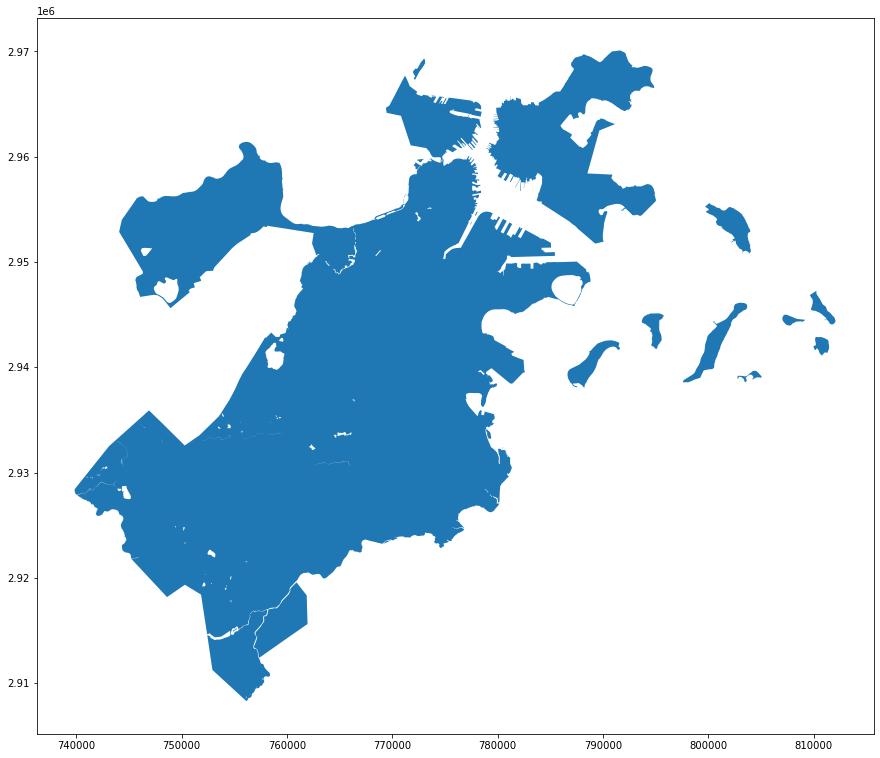

In [39]:
boston_map = gpd.read_file('https://bostonopendata-boston.opendata.arcgis.com/datasets/boston::city-of-boston-boundary.zip?outSR=%7B%22latestWkid%22%3A2249%2C%22wkid%22%3A102686%7D')
fig,ax = plt.subplots(figsize = (15,15))
boston_map.plot(ax=ax)

In [55]:
geometry= [Point(xy) for xy in zip(crimes['Long'], crimes['Lat'])]
place_crimes = gpd.GeoDataFrame(crimes, geometry = geometry)

place_crimes['geometry']

geometry = place_crimes.geometry.to_numpy()
geometry

0         POINT (-71.13937 42.35779)
1         POINT (-71.06030 42.30682)
2         POINT (-71.07243 42.34659)
3         POINT (-71.07866 42.33418)
4         POINT (-71.09036 42.27537)
                     ...            
319068    POINT (-71.08575 42.33695)
319069    POINT (-71.12317 42.25593)
319070    POINT (-71.12317 42.25593)
319071    POINT (-71.11156 42.30233)
319072    POINT (-71.08029 42.33384)
Name: geometry, Length: 319073, dtype: geometry

OSError: exception: access violation writing 0x00007FFF83E45BC0

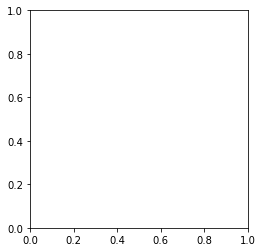

In [62]:
# fig,ax = plt.subplots(figsize = (15,15))
boston_map.plot("geometry")